In [228]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.metrics import classification_report

In [252]:
def evaluate_normal_model(pred , test):
    recall = recall_score(test, pred)
    precision = precision_score(test, pred)
    f1 = f1_score(test, pred)
    accuracy = accuracy_score(test, pred)
    
    return recall, precision, f1, accuracy

In [266]:
def evaluate_cv_model(model, data, target, kFolds):
    a_score = cross_val_score(model, data, target, cv=kFolds, scoring='accuracy')
    accuracy = a_score.mean()

    return accuracy

In [231]:
def plot_confusionMatrix (clf, y_test, X_test):
    
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Blues")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    report = classification_report(y_test, y_pred)
    plt.show()

    return report

In [232]:
# KNN classifier
def KNN(X_train, y_train, X_test, y_test, num_neighbors):
    
    # create the model
    KNN = KNeighborsClassifier(n_neighbors = num_neighbors)
    
    # fit the model
    KNN.fit(X_train, y_train)
    
    # get the accuracy
    test_accuracy = KNN.score(X_test, y_test)
    train_accuracy = KNN.score(X_train, y_train)
    
    # predict the values
    prediction = KNN.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction, KNN

In [233]:
def SVM (X_train, y_train, X_test, y_test, kernel):

    # create the model for multiclass classification
    SVM = svm.SVC(kernel=kernel, C=1, decision_function_shape='ovo')
    
    # fit the model
    SVM.fit(X_train, y_train)
    
    # get the accuracy
    test_accuracy = SVM.score(X_test, y_test)
    train_accuracy = SVM.score(X_train, y_train)
    
    # predict the values
    prediction = SVM.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction, SVM

In [234]:
def Logistic_Regression (X_train, y_train, X_test, y_test):
    
    # create the model
    log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

    # fit the model
    log_reg.fit(X_train, y_train)

    # get the accuracy
    test_accuracy = log_reg.score(X_test, y_test)
    train_accuracy = log_reg.score(X_train, y_train)

    # predict the values
    prediction = log_reg.predict(X_test)

    return test_accuracy, train_accuracy, prediction, log_reg

## Read the data

In [235]:
# EEG + ECG data
Both_data = pd.read_csv('Final_Data.csv')

EEG_data = pd.read_csv('preprocessed_EEG.csv')

ECG_data = pd.read_csv('preprocessed_ECG.csv')

In [236]:
# drop unnecessary columns
Both_data.drop(['Unnamed: 0'], axis=1, inplace=True)
EEG_data.drop(['Unnamed: 0'], axis=1, inplace=True)
ECG_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [237]:
y_Both = Both_data.target
X_Both = Both_data.drop('target' , axis = 1)

In [238]:
y_EEG = EEG_data.target
X_EEG = EEG_data.drop('target' , axis = 1)

In [239]:
y_ECG = ECG_data.target
X_ECG = ECG_data.drop('target' , axis = 1)

## Splitting the data

In [240]:
kf = KFold(n_splits=8, random_state=42 , shuffle = True)

In [241]:
X_train_Both, X_test_Both, y_train_Both, y_test_Both = train_test_split(X_Both, y_Both, test_size = 0.2, random_state = 42)
X_train_EEG, X_test_EEG, y_train_EEG, y_test_EEG = train_test_split(X_EEG, y_EEG, test_size = 0.2, random_state = 42)
X_train_ECG, X_test_ECG, y_train_ECG, y_test_ECG = train_test_split(X_ECG, y_ECG, test_size = 0.2, random_state = 42)

In [242]:
y_test_Both = np.array(y_test_Both)
y_test_EEG = np.array(y_test_EEG)
y_test_ECG = np.array(y_test_ECG)

In [223]:
# Function to evaluate the model
def Evaluate (y_test, prediction):
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='weighted')
    recall = recall_score(y_test, prediction, average='weighted')
    f1 = f1_score(y_test, prediction, average='weighted')
    return accuracy, precision, recall, f1

# KNN model

## EEG Data

### Choosing the best k value

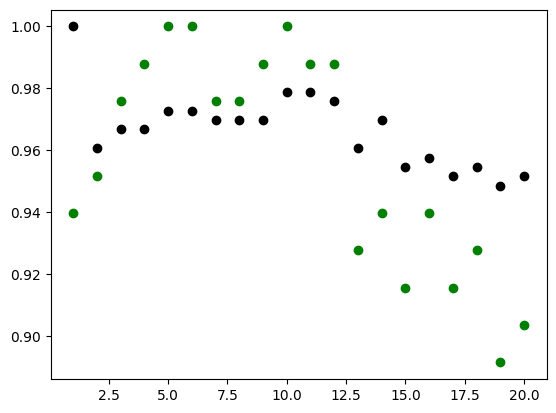

In [243]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_EEG, y_train_EEG)
  
    training_score = knn.score(X_train_EEG, y_train_EEG)
    test_score = knn.score(X_test_EEG, y_test_EEG)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Evaluation without Cross Validation

In [247]:
KNN_test, KNN_train, KNN_prediction, KNN_model = KNN(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 11)
#print(KNN_test*100, KNN_train*100)
print(f"Triaing Accuracy: {KNN_train*100}\nTesting Accuracy: {KNN_test*100}")

Triaing Accuracy: 97.88519637462235
Testing Accuracy: 98.79518072289156


### Evaulation with Cross Validation

In [267]:
cv_accuracy = evaluate_cv_model(KNN_model, X_EEG, y_EEG, kf)
print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 96.38009049773756


### Confusion Matrix

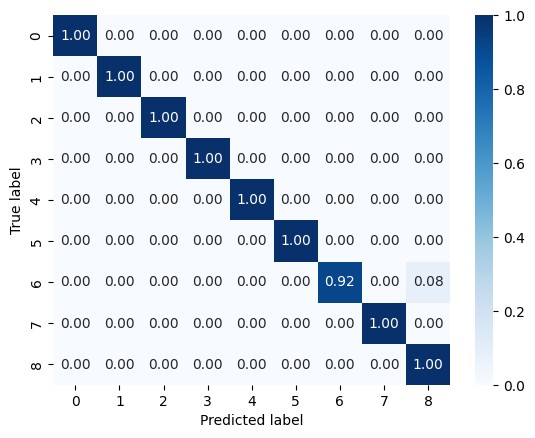

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         5\n           1       1.00      1.00      1.00        11\n           2       1.00      1.00      1.00         8\n           3       1.00      1.00      1.00         8\n           4       1.00      1.00      1.00         9\n           5       1.00      1.00      1.00        11\n           6       1.00      0.92      0.96        12\n           7       1.00      1.00      1.00        11\n           8       0.89      1.00      0.94         8\n\n    accuracy                           0.99        83\n   macro avg       0.99      0.99      0.99        83\nweighted avg       0.99      0.99      0.99        83\n'

In [248]:
plot_confusionMatrix(KNN_model, y_test_EEG, X_test_EEG)

### Evaluating the model

In [249]:
accuracy_score, precision_score, recall_score, f1_score = Evaluate(y_test_EEG, KNN_prediction)

In [254]:
Scores = {
    "Model":["KNN"],\
    "Accuracy":[accuracy_score*100],\
    "Precision":[precision_score*100],\
    "Recall":[recall_score*100],\
    "F1":[f1_score*100]
    }

Scores=pd.DataFrame(Scores)
Scores

,Model,Accuracy,Precision,Recall,F1
0,KNN,98.795181,98.92905,98.795181,98.804425


## ECG Data

### Choosing the best k value

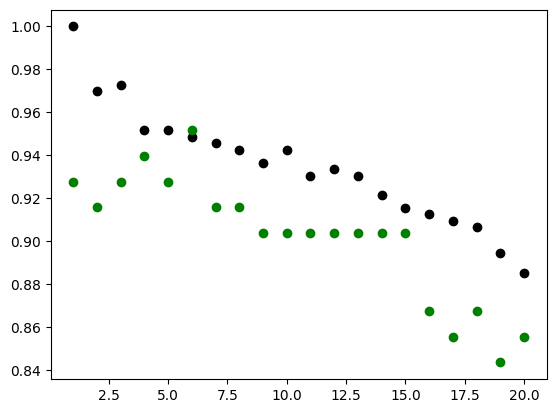

In [255]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_ECG, y_train_ECG)
  
    training_score = knn.score(X_train_ECG, y_train_ECG)
    test_score = knn.score(X_test_ECG, y_test_ECG)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Evaluation without Cross Validation

In [256]:
KNN_test, KNN_train, KNN_prediction, KNN_model = KNN(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 6)
print(f"Triaing Accuracy: {KNN_train*100}\nTesting Accuracy: {KNN_test*100}")

Triaing Accuracy: 94.86404833836858
Testing Accuracy: 95.18072289156626


### Evaluation with Cross Validation

In [268]:
cv_accuracy = evaluate_cv_model(KNN_model, X_ECG, y_ECG, kf)
print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 93.97153092006033


### Confusion Matrix

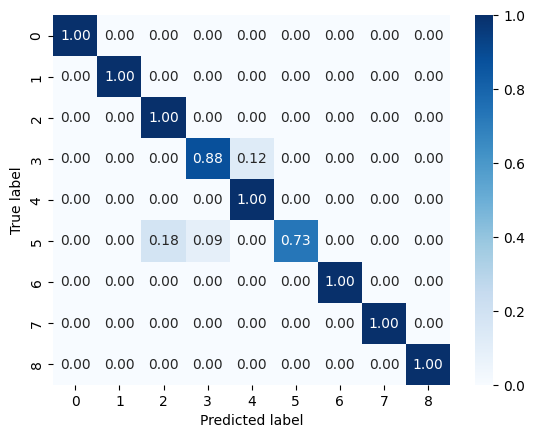

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         5\n           1       1.00      1.00      1.00        11\n           2       0.80      1.00      0.89         8\n           3       0.88      0.88      0.88         8\n           4       0.90      1.00      0.95         9\n           5       1.00      0.73      0.84        11\n           6       1.00      1.00      1.00        12\n           7       1.00      1.00      1.00        11\n           8       1.00      1.00      1.00         8\n\n    accuracy                           0.95        83\n   macro avg       0.95      0.96      0.95        83\nweighted avg       0.96      0.95      0.95        83\n'

In [257]:
plot_confusionMatrix(KNN_model, y_test_ECG, X_test_ECG)

In [258]:
accuracy_score, precision_score, recall_score, f1_score = Evaluate(y_test_ECG, KNN_prediction)

TypeError: 'numpy.float64' object is not callable

In [259]:
accuracy_score, precision_score, recall_score, f1_score = evaluate_normal_model(KNN_prediction, y_test_ECG)

TypeError: 'numpy.float64' object is not callable

## ECG + EEG Data

### Choosing the best k value

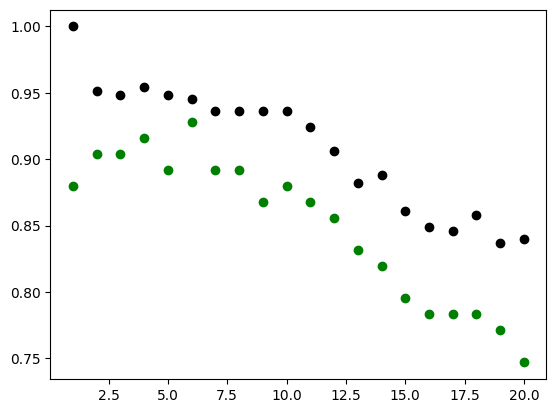

In [269]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_Both, y_train_Both)
  
    training_score = knn.score(X_train_Both, y_train_Both)
    test_score = knn.score(X_test_Both, y_test_Both)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Evaluation without Cross Validation

In [270]:
KNN_test, KNN_train, KNN_prediction, KNN_model = KNN(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 6)
print(f"Triaing Accuracy: {KNN_train*100}\nTesting Accuracy: {KNN_test*100}")

Triaing Accuracy: 94.5619335347432
Testing Accuracy: 92.7710843373494


### Evaluation with Cross Validation

In [271]:
cv_accuracy = evaluate_cv_model(KNN_model, X_Both, y_Both, kf)
print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 90.84181749622925


### Confusion Matrix

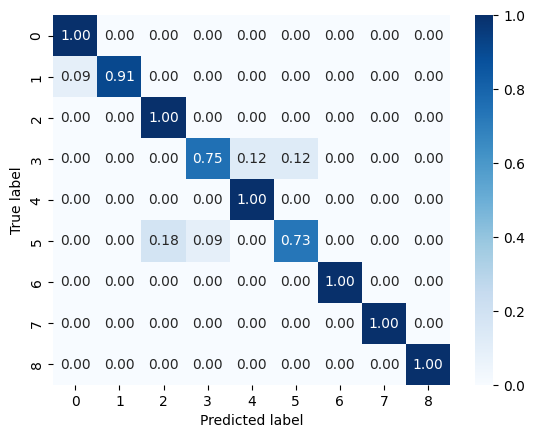

'              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.91         5\n           1       1.00      0.91      0.95        11\n           2       0.80      1.00      0.89         8\n           3       0.86      0.75      0.80         8\n           4       0.90      1.00      0.95         9\n           5       0.89      0.73      0.80        11\n           6       1.00      1.00      1.00        12\n           7       1.00      1.00      1.00        11\n           8       1.00      1.00      1.00         8\n\n    accuracy                           0.93        83\n   macro avg       0.92      0.93      0.92        83\nweighted avg       0.93      0.93      0.93        83\n'

In [273]:
plot_confusionMatrix(KNN_model, y_test_Both, X_test_Both)

In [263]:
accuracy_score, precision_score, recall_score, f1_score = Evaluate(y_test_Both, KNN_prediction)

TypeError: 'numpy.float64' object is not callable

# SVM models

## EEG Data

### Linear Kernel

### Evaluation without Cross Validation

In [274]:
SVM_linear_test, SVM_linear_train, SVM_linear_prediction, SVM_model_linear = SVM(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 'linear')

print(f"Triaing Accuracy: {SVM_linear_train*100}\nTesting Accuracy: {SVM_linear_test*100}")

Triaing Accuracy: 64.6525679758308
Testing Accuracy: 54.21686746987952


### Evaluation with Cross Validation

In [276]:
cv_accuracy = evaluate_cv_model(SVM_model_linear, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 51.710972850678736


### Confusion Matrix

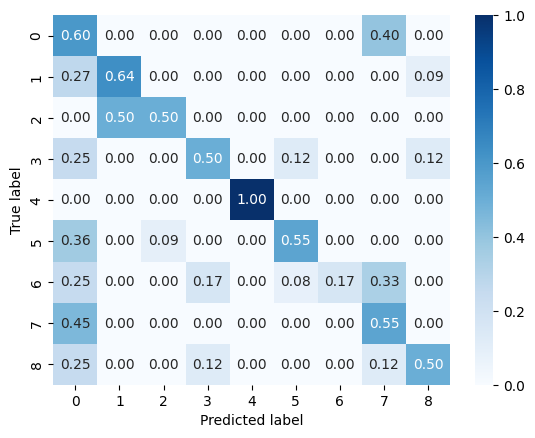

'              precision    recall  f1-score   support\n\n           0       0.14      0.60      0.22         5\n           1       0.64      0.64      0.64        11\n           2       0.80      0.50      0.62         8\n           3       0.57      0.50      0.53         8\n           4       1.00      1.00      1.00         9\n           5       0.75      0.55      0.63        11\n           6       1.00      0.17      0.29        12\n           7       0.46      0.55      0.50        11\n           8       0.67      0.50      0.57         8\n\n    accuracy                           0.54        83\n   macro avg       0.67      0.55      0.56        83\nweighted avg       0.70      0.54      0.56        83\n'

In [277]:
plot_confusionMatrix(SVM_model_linear, y_test_EEG, X_test_EEG)

### RBF Kernel

### Evaluation without Cross Validation

In [278]:
SVM_RBF_test, SVM_RBF_train, SVM_RBF_prediction, SVM_model_RBF = SVM(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 'rbf')

print(f"Triaing Accuracy: {SVM_RBF_train*100}\nTesting Accuracy: {SVM_RBF_test*100}")

Triaing Accuracy: 65.25679758308158
Testing Accuracy: 54.21686746987952


### Evaluation with Cross Validation

In [280]:
cv_accuracy = evaluate_cv_model(SVM_model_RBF, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 58.68212669683258


### Confusion Matrix

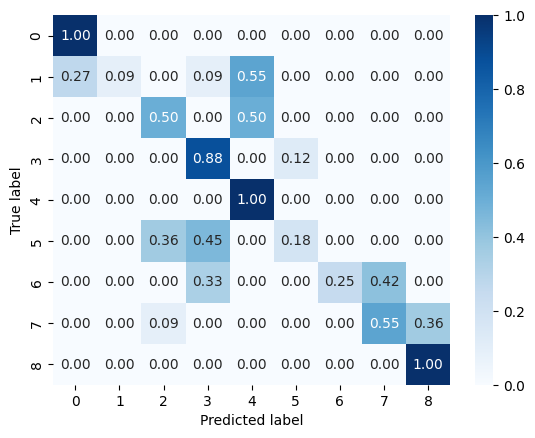

'              precision    recall  f1-score   support\n\n           0       0.62      1.00      0.77         5\n           1       1.00      0.09      0.17        11\n           2       0.44      0.50      0.47         8\n           3       0.41      0.88      0.56         8\n           4       0.47      1.00      0.64         9\n           5       0.67      0.18      0.29        11\n           6       1.00      0.25      0.40        12\n           7       0.55      0.55      0.55        11\n           8       0.67      1.00      0.80         8\n\n    accuracy                           0.54        83\n   macro avg       0.65      0.60      0.52        83\nweighted avg       0.67      0.54      0.48        83\n'

In [282]:
plot_confusionMatrix(SVM_model_RBF, y_test_EEG, X_test_EEG)

### Sigmoid Kernel

### Evaluation without Cross Validation

In [283]:
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction, SVM_model_sigmoid = SVM(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 'sigmoid')

print(f"Triaing Accuracy: {SVM_sigmoid_train*100}\nTesting Accuracy: {SVM_sigmoid_test*100}")

Triaing Accuracy: 24.773413897280967
Testing Accuracy: 26.506024096385545


### Evaluation with Cross Validation

In [284]:
cv_accuracy = evaluate_cv_model(SVM_model_sigmoid, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 21.526206636500756


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


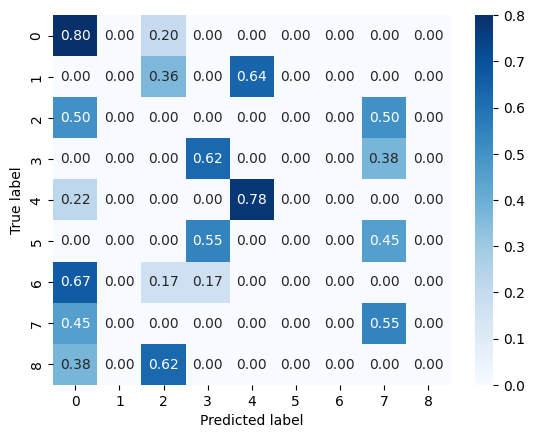

'              precision    recall  f1-score   support\n\n           0       0.15      0.80      0.26         5\n           1       0.00      0.00      0.00        11\n           2       0.00      0.00      0.00         8\n           3       0.38      0.62      0.48         8\n           4       0.50      0.78      0.61         9\n           5       0.00      0.00      0.00        11\n           6       0.00      0.00      0.00        12\n           7       0.33      0.55      0.41        11\n           8       0.00      0.00      0.00         8\n\n    accuracy                           0.27        83\n   macro avg       0.15      0.31      0.20        83\nweighted avg       0.14      0.27      0.18        83\n'

In [285]:
plot_confusionMatrix(SVM_model_sigmoid, y_test_EEG, X_test_EEG)

### Polynomial Kernel

### Evaluation without Cross Validation

In [286]:
SVM_poly_test, SVM_poly_train, SVM_poly_prediction, SVM_model_Poly = SVM(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 'poly')

print(f"Triaing Accuracy: {SVM_poly_train*100}\nTesting Accuracy: {SVM_poly_test*100}")

Triaing Accuracy: 58.30815709969789
Testing Accuracy: 49.39759036144578


### Evaluation with Cross Validation

In [287]:
cv_accuracy = evaluate_cv_model(SVM_model_Poly, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 50.259238310708895


### Confusion Matrix

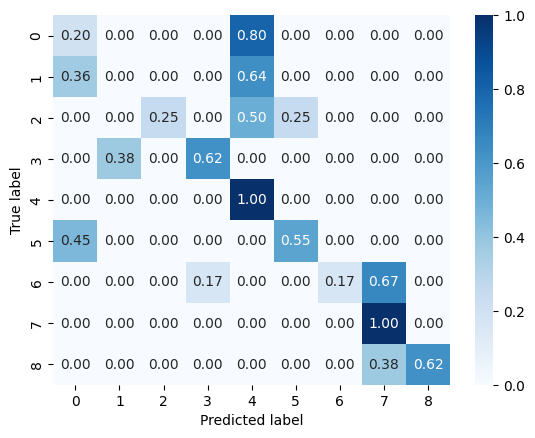

'              precision    recall  f1-score   support\n\n           0       0.10      0.20      0.13         5\n           1       0.00      0.00      0.00        11\n           2       1.00      0.25      0.40         8\n           3       0.71      0.62      0.67         8\n           4       0.38      1.00      0.55         9\n           5       0.75      0.55      0.63        11\n           6       1.00      0.17      0.29        12\n           7       0.50      1.00      0.67        11\n           8       1.00      0.62      0.77         8\n\n    accuracy                           0.49        83\n   macro avg       0.60      0.49      0.46        83\nweighted avg       0.62      0.49      0.46        83\n'

In [288]:
plot_confusionMatrix(SVM_model_Poly, y_test_EEG, X_test_EEG)

## ECG Data

### Linear Kernel

### Evaluation without Cross Validation

In [292]:
SVM_linear_test, SVM_linear_train, SVM_linear_prediction, SVM_model_linear = SVM(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 'linear')

print(f"Triaing Accuracy: {SVM_linear_train*100}\nTesting Accuracy: {SVM_linear_test*100}")

Triaing Accuracy: 88.51963746223565
Testing Accuracy: 84.33734939759037


### Evaluation with Cross Validation

In [293]:
cv_accuracy = evaluate_cv_model(SVM_model_linear, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 78.9828431372549


### Confusion Matrix

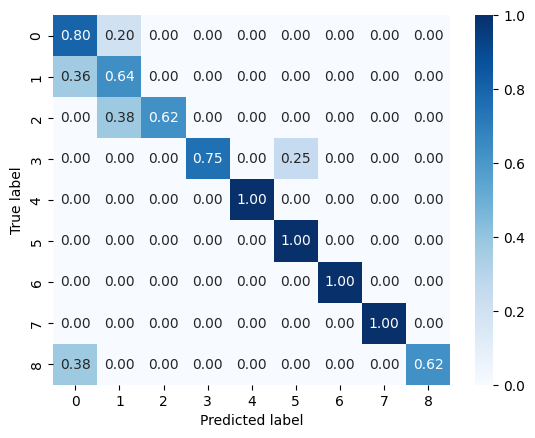

'              precision    recall  f1-score   support\n\n           0       0.36      0.80      0.50         5\n           1       0.64      0.64      0.64        11\n           2       1.00      0.62      0.77         8\n           3       1.00      0.75      0.86         8\n           4       1.00      1.00      1.00         9\n           5       0.85      1.00      0.92        11\n           6       1.00      1.00      1.00        12\n           7       1.00      1.00      1.00        11\n           8       1.00      0.62      0.77         8\n\n    accuracy                           0.84        83\n   macro avg       0.87      0.83      0.83        83\nweighted avg       0.89      0.84      0.85        83\n'

In [294]:
plot_confusionMatrix(SVM_model_linear, y_test_ECG, X_test_ECG)

### RBF Kernel

### Evaluation without Cross Validation

In [295]:
SVM_RBF_test, SVM_RBF_train, SVM_RBF_prediction, SVM_model_RBF = SVM(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 'rbf')

print(f"Triaing Accuracy: {SVM_RBF_train*100}\nTesting Accuracy: {SVM_RBF_test*100}")

Triaing Accuracy: 74.32024169184291
Testing Accuracy: 69.87951807228916


### Evaluation with Cross Validation

In [296]:
cv_accuracy = evaluate_cv_model(SVM_model_RBF, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 67.65648567119156


### Confusion Matrix

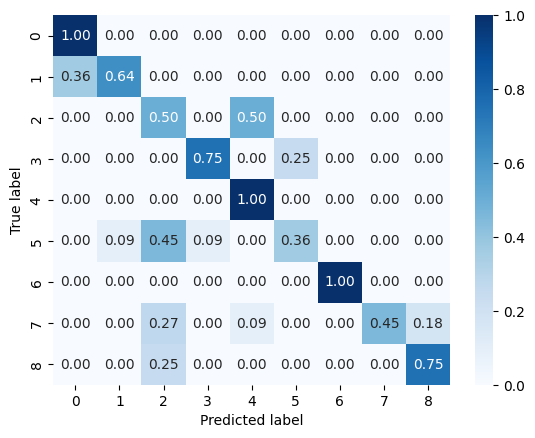

'              precision    recall  f1-score   support\n\n           0       0.56      1.00      0.71         5\n           1       0.88      0.64      0.74        11\n           2       0.29      0.50      0.36         8\n           3       0.86      0.75      0.80         8\n           4       0.64      1.00      0.78         9\n           5       0.67      0.36      0.47        11\n           6       1.00      1.00      1.00        12\n           7       1.00      0.45      0.62        11\n           8       0.75      0.75      0.75         8\n\n    accuracy                           0.70        83\n   macro avg       0.74      0.72      0.69        83\nweighted avg       0.77      0.70      0.70        83\n'

In [297]:
plot_confusionMatrix(SVM_model_RBF, y_test_ECG, X_test_ECG)

### Sigmoid Kernel

### Evaluation without Cross Validation

In [298]:
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction, SVM_model_sigmoid = SVM(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 'sigmoid')

print(f"Triaing Accuracy: {SVM_sigmoid_train*100}\nTesting Accuracy: {SVM_sigmoid_test*100}")

Triaing Accuracy: 16.012084592145015
Testing Accuracy: 12.048192771084338


### Evaluation with Cross Validation

In [299]:
cv_accuracy = evaluate_cv_model(SVM_model_sigmoid, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 15.973793363499244


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


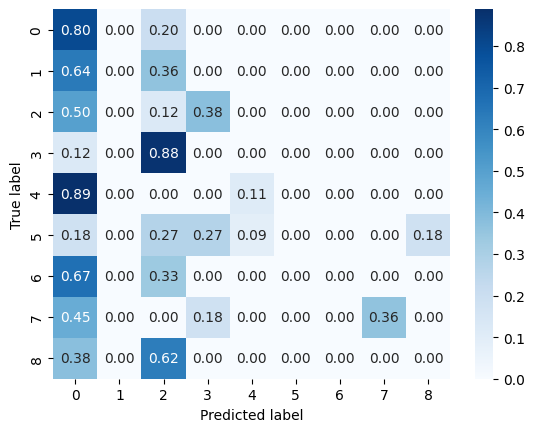

'              precision    recall  f1-score   support\n\n           0       0.10      0.80      0.17         5\n           1       0.00      0.00      0.00        11\n           2       0.04      0.12      0.06         8\n           3       0.00      0.00      0.00         8\n           4       0.50      0.11      0.18         9\n           5       0.00      0.00      0.00        11\n           6       0.00      0.00      0.00        12\n           7       1.00      0.36      0.53        11\n           8       0.00      0.00      0.00         8\n\n    accuracy                           0.12        83\n   macro avg       0.18      0.16      0.11        83\nweighted avg       0.20      0.12      0.11        83\n'

In [300]:
plot_confusionMatrix(SVM_model_sigmoid, y_test_ECG, X_test_ECG)

### Polynomial Kernel

### Evaluation without Cross Validation

In [301]:
SVM_poly_test, SVM_poly_train, SVM_poly_prediction, SVM_model_Poly = SVM(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 'poly')

print(f"Triaing Accuracy: {SVM_poly_train*100}\nTesting Accuracy: {SVM_poly_test*100}")

Triaing Accuracy: 55.58912386706949
Testing Accuracy: 51.80722891566265


### Evaluation with Cross Validation

In [302]:
cv_accuracy = evaluate_cv_model(SVM_model_Poly, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 53.62462292609352


### Confusion Matrix

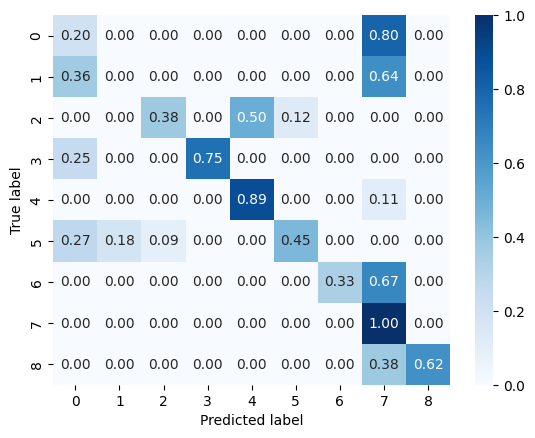

'              precision    recall  f1-score   support\n\n           0       0.10      0.20      0.13         5\n           1       0.00      0.00      0.00        11\n           2       0.75      0.38      0.50         8\n           3       1.00      0.75      0.86         8\n           4       0.67      0.89      0.76         9\n           5       0.83      0.45      0.59        11\n           6       1.00      0.33      0.50        12\n           7       0.32      1.00      0.49        11\n           8       1.00      0.62      0.77         8\n\n    accuracy                           0.52        83\n   macro avg       0.63      0.51      0.51        83\nweighted avg       0.64      0.52      0.51        83\n'

In [303]:
plot_confusionMatrix(SVM_model_Poly, y_test_ECG, X_test_ECG)

## ECG + EEG Data

### Linear Kernel

### Evaluation without Cross Validation

In [304]:
SVM_linear_test, SVM_linear_train, SVM_linear_prediction, SVM_model_linear = SVM(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 'linear')

print(f"Triaing Accuracy: {SVM_linear_train*100}\nTesting Accuracy: {SVM_linear_test*100}")

Triaing Accuracy: 89.72809667673715
Testing Accuracy: 79.51807228915662


### Evaluation with Cross Validation

In [305]:
cv_accuracy = evaluate_cv_model(SVM_model_linear, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 76.55071644042233


### Confusion Matrix

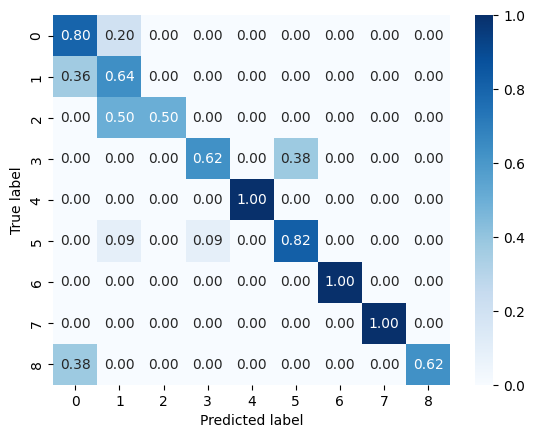

'              precision    recall  f1-score   support\n\n           0       0.36      0.80      0.50         5\n           1       0.54      0.64      0.58        11\n           2       1.00      0.50      0.67         8\n           3       0.83      0.62      0.71         8\n           4       1.00      1.00      1.00         9\n           5       0.75      0.82      0.78        11\n           6       1.00      1.00      1.00        12\n           7       1.00      1.00      1.00        11\n           8       1.00      0.62      0.77         8\n\n    accuracy                           0.80        83\n   macro avg       0.83      0.78      0.78        83\nweighted avg       0.85      0.80      0.80        83\n'

In [306]:
plot_confusionMatrix(SVM_model_linear, y_test_Both, X_test_Both)

### RBF Kernel

### Evaluation without Cross Validation

In [307]:
SVM_RBF_test, SVM_RBF_train, SVM_RBF_prediction, SVM_model_RBF = SVM(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 'rbf')

print(f"Triaing Accuracy: {SVM_RBF_train*100}\nTesting Accuracy: {SVM_RBF_test*100}")

Triaing Accuracy: 62.53776435045317
Testing Accuracy: 57.831325301204814


### Evaluation with Cross Validation

In [308]:
cv_accuracy = evaluate_cv_model(SVM_model_RBF, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 54.350490196078425


### Confusion Matrix

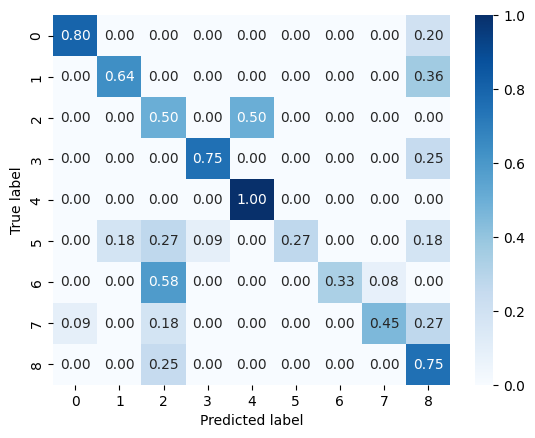

'              precision    recall  f1-score   support\n\n           0       0.80      0.80      0.80         5\n           1       0.78      0.64      0.70        11\n           2       0.22      0.50      0.31         8\n           3       0.86      0.75      0.80         8\n           4       0.69      1.00      0.82         9\n           5       1.00      0.27      0.43        11\n           6       1.00      0.33      0.50        12\n           7       0.83      0.45      0.59        11\n           8       0.33      0.75      0.46         8\n\n    accuracy                           0.58        83\n   macro avg       0.72      0.61      0.60        83\nweighted avg       0.75      0.58      0.59        83\n'

In [309]:
plot_confusionMatrix(SVM_model_RBF, y_test_Both, X_test_Both)

### Sigmoid Kernel

### Evaluation without Cross Validation

In [311]:
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction, SVM_model_sigmoid = SVM(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 'sigmoid')

print(f"Triaing Accuracy: {SVM_sigmoid_train*100}\nTesting Accuracy: {SVM_sigmoid_test*100}")

Triaing Accuracy: 15.407854984894259
Testing Accuracy: 14.457831325301203


### Evaluation with Cross Validation

In [312]:
cv_accuracy = evaluate_cv_model(SVM_model_sigmoid, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 19.36274509803922


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


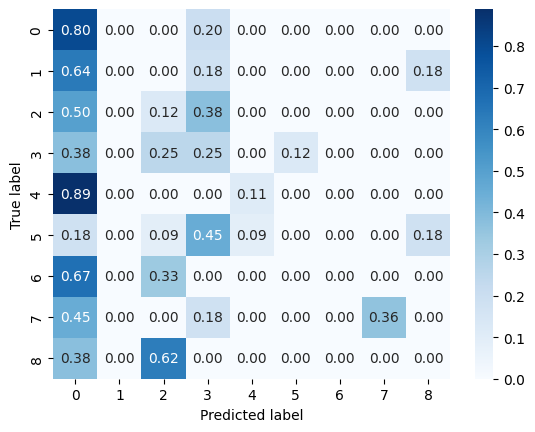

'              precision    recall  f1-score   support\n\n           0       0.09      0.80      0.16         5\n           1       0.00      0.00      0.00        11\n           2       0.08      0.12      0.10         8\n           3       0.13      0.25      0.17         8\n           4       0.50      0.11      0.18         9\n           5       0.00      0.00      0.00        11\n           6       0.00      0.00      0.00        12\n           7       1.00      0.36      0.53        11\n           8       0.00      0.00      0.00         8\n\n    accuracy                           0.14        83\n   macro avg       0.20      0.18      0.13        83\nweighted avg       0.21      0.14      0.13        83\n'

In [313]:
plot_confusionMatrix(SVM_model_sigmoid, y_test_Both, X_test_Both)

### Polynomial Kernel

### Evaluation without Cross Validation

In [314]:
SVM_poly_test, SVM_poly_train, SVM_poly_prediction, SVM_model_Poly = SVM(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 'poly')

print(f"Triaing Accuracy: {SVM_poly_train*100}\nTesting Accuracy: {SVM_poly_test*100}")

Triaing Accuracy: 60.12084592145015
Testing Accuracy: 54.21686746987952


### Evaluation with Cross Validation

In [315]:
cv_accuracy = evaluate_cv_model(SVM_model_Poly, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 52.187028657616885


### Confusion Matrix

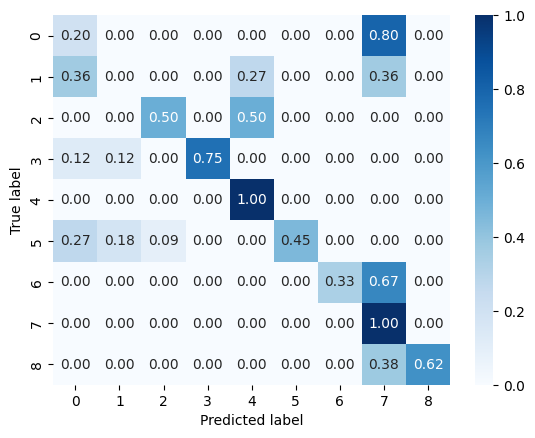

'              precision    recall  f1-score   support\n\n           0       0.11      0.20      0.14         5\n           1       0.00      0.00      0.00        11\n           2       0.80      0.50      0.62         8\n           3       1.00      0.75      0.86         8\n           4       0.56      1.00      0.72         9\n           5       1.00      0.45      0.62        11\n           6       1.00      0.33      0.50        12\n           7       0.37      1.00      0.54        11\n           8       1.00      0.62      0.77         8\n\n    accuracy                           0.54        83\n   macro avg       0.65      0.54      0.53        83\nweighted avg       0.66      0.54      0.53        83\n'

In [316]:
plot_confusionMatrix(SVM_model_Poly, y_test_Both, X_test_Both)

### Evaluating the models

In [20]:
accuracy_score_poly, precision_score_poly, recall_score_poly, f1_score_poly = Evaluate(y_test, SVM_poly_prediction)

accuracy_score_linear, precision_score_linear, recall_score_linear, f1_score_linear = Evaluate(y_test, SVM_linear_prediction)

accuracy_score_sigmoid, precision_score_sigmoid, recall_score_sigmoid, f1_score_sigmoid = Evaluate(y_test, SVM_sigmoid_prediction)

accuracy_score_rbf, precision_score_rbf, recall_score_rbf, f1_score_rbf = Evaluate(y_test, SVM_rbf_prediction)

TypeError: 'numpy.float64' object is not callable

In [ ]:
Scores = {
    "Model":["Linear SVM","RBF SVM","Sigmoid SVM","Poly SVM"],\
    "Accuracy":[accuracy_score_linear*100, accuracy_score_rbf*100, accuracy_score_sigmoid*100, accuracy_score_poly*100],\
    "Precision":[precision_score_linear*100, precision_score_rbf*100, precision_score_sigmoid*100, precision_score_poly*100],\
    "Recall":[recall_score_linear*100, recall_score_rbf*100, recall_score_sigmoid*100, recall_score_poly*100],\
    "F1":[f1_score_linear*100, f1_score_rbf*100, f1_score_sigmoid*100, f1_score_poly*100]
    }

Scores=pd.DataFrame(Scores)
Scores

# Logistic Regression model

## EEG Data

### Evaluation without Cross Validation

In [317]:
LOG_REG_test, LOG_REG_train, LOG_REG_prediction, LOG_REG_model = Logistic_Regression(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG)

print(f"Triaing Accuracy: {LOG_REG_train*100}\nTesting Accuracy: {LOG_REG_test*100}")

Triaing Accuracy: 38.670694864048336
Testing Accuracy: 28.915662650602407


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation with Cross Validation

In [318]:
cv_accuracy = evaluate_cv_model(LOG_REG_model, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 26.824095022624434


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

### Confusion Matrix

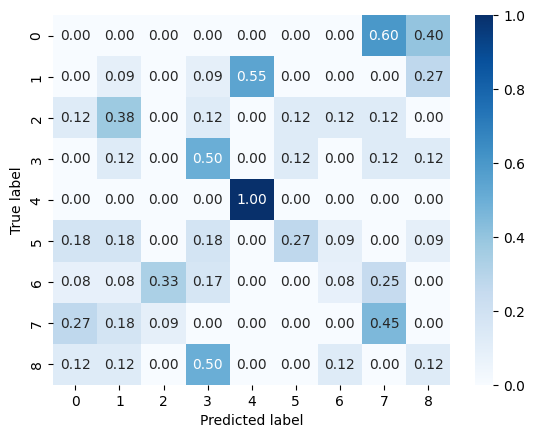

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         5\n           1       0.09      0.09      0.09        11\n           2       0.00      0.00      0.00         8\n           3       0.29      0.50      0.36         8\n           4       0.60      1.00      0.75         9\n           5       0.60      0.27      0.37        11\n           6       0.25      0.08      0.12        12\n           7       0.38      0.45      0.42        11\n           8       0.12      0.12      0.12         8\n\n    accuracy                           0.29        83\n   macro avg       0.26      0.28      0.25        83\nweighted avg       0.28      0.29      0.26        83\n'

In [319]:
plot_confusionMatrix(LOG_REG_model, y_test_EEG, X_test_EEG)

## ECG Data

### Evaluation without Cross Validation

In [320]:
LOG_REG_test, LOG_REG_train, LOG_REG_prediction, LOG_REG_model = Logistic_Regression(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG)

print(f"Triaing Accuracy: {LOG_REG_train*100}\nTesting Accuracy: {LOG_REG_test*100}")

Triaing Accuracy: 45.01510574018127
Testing Accuracy: 34.93975903614458


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation with Cross Validation

In [321]:
cv_accuracy = evaluate_cv_model(LOG_REG_model, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 35.053733031674206


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

### Confusion Matrix

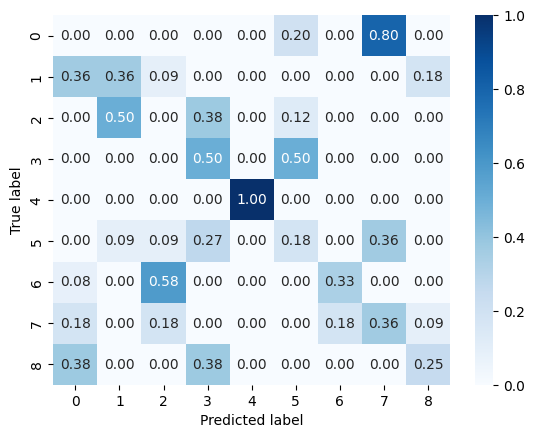

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         5\n           1       0.44      0.36      0.40        11\n           2       0.00      0.00      0.00         8\n           3       0.31      0.50      0.38         8\n           4       1.00      1.00      1.00         9\n           5       0.25      0.18      0.21        11\n           6       0.67      0.33      0.44        12\n           7       0.33      0.36      0.35        11\n           8       0.40      0.25      0.31         8\n\n    accuracy                           0.35        83\n   macro avg       0.38      0.33      0.34        83\nweighted avg       0.41      0.35      0.37        83\n'

In [322]:
plot_confusionMatrix(LOG_REG_model, y_test_ECG, X_test_ECG)

## ECG + EEG Data

### Evaluation without Cross Validation

In [323]:
LOG_REG_test, LOG_REG_train, LOG_REG_prediction, LOG_REG_model = Logistic_Regression(X_train_Both, y_train_Both, X_test_Both, y_test_Both)

print(f"Triaing Accuracy: {LOG_REG_train*100}\nTesting Accuracy: {LOG_REG_test*100}")

Triaing Accuracy: 57.70392749244713
Testing Accuracy: 38.55421686746988


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation with Cross Validation

In [324]:
cv_accuracy = evaluate_cv_model(LOG_REG_model, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 35.77960030165912


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

### Confusion Matrix

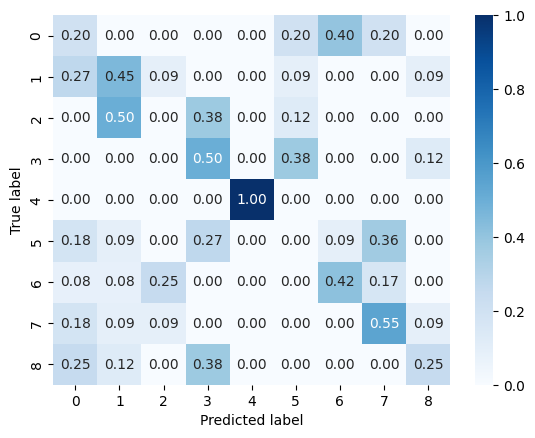

'              precision    recall  f1-score   support\n\n           0       0.09      0.20      0.13         5\n           1       0.38      0.45      0.42        11\n           2       0.00      0.00      0.00         8\n           3       0.31      0.50      0.38         8\n           4       1.00      1.00      1.00         9\n           5       0.00      0.00      0.00        11\n           6       0.62      0.42      0.50        12\n           7       0.46      0.55      0.50        11\n           8       0.40      0.25      0.31         8\n\n    accuracy                           0.39        83\n   macro avg       0.36      0.37      0.36        83\nweighted avg       0.38      0.39      0.38        83\n'

In [325]:
plot_confusionMatrix(LOG_REG_model, y_test_Both, X_test_Both)